In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
df=pd.read_excel("Phytic_acid.xlsx")
df
X=df.drop(["CF"],axis=1).values
y=df["CF"].values

# OLS

In [2]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [3]:
train_r2 = model.score(X,y)
print(f"coefficient of determination in train: {train_r2}")
# Above gives goodness of fit in the training data
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination in train: 0.993304665822453
intercept: -0.04971277250687978
slope: [0.99241517]


In [4]:
y=y.reshape(-1,1)
X=X.reshape(-1,1)
model_IOLS=LinearRegression()
model_IOLS.fit(y,X)


LinearRegression()

# IOLS Method

In [5]:
train_r2 = model_IOLS.score(y,X)
print(f"coefficient of determination in train: {train_r2}")
# Above gives goodness of fit in the training data
print(f"intercept: {model_IOLS.intercept_}")
print(f"slope: {model_IOLS.coef_}")


coefficient of determination in train: 0.993304665822453
intercept: [0.06325178]
slope: [[1.0008963]]


In [6]:
# There is no library for doing TLS so we do the calculation here and do the writing in paper

# TLS

In [7]:
x=np.array(df['EP'])
y=np.array(df['CF'])
print(f"x_mean:{sum(x)/len(x)}")
print(f"y_mean:{sum(y)/len(y)}")


x_mean:2.0155000000000003
y_mean:1.9505000000000003


In [8]:
cov_matrix=np.array([x,y])
print(np.cov(cov_matrix))


[[0.98014184 0.97270763]
 [0.97270763 0.97183658]]


In [9]:
df.describe()


,EP,CF
count,20.000000,20.000000
mean,2.015500,1.950500
std,0.990021,0.985818
min,0.130000,0.140000
25%,1.477500,1.332500
50%,2.160000,2.035000
75%,2.745000,2.725000
max,3.560000,3.420000


# Question 2 (OLS)

In [10]:
df2=pd.read_csv("epa-sea-level.csv")
df2

,Year,Rise(mm/year)
0,1880,0.000000
1,1881,0.220472
2,1882,-0.440945
3,1883,-0.232283
4,1884,0.590551
...,...,...
129,2009,8.586614
130,2010,8.901575
131,2011,8.964567
132,2012,9.326772


In [11]:
df = pd.read_csv('epa-sea-level.csv')
x=np.array(df['Year']).reshape(-1,1)
y=np.array(df['Rise(mm/year)']).reshape(-1,1)
model=LinearRegression()
model.fit(x,y)
train_r2 = model.score(x,y)
print(f"coefficient of determination in train: {train_r2}")
# Above gives goodness of fit in the training data
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination in train: 0.9697466074149554
intercept: [-119.06594197]
slope: [[0.06304458]]


In [13]:
sealevel=0
year=2014
while sealevel<=750:
    y_pred = model.predict([[year]])
    sealevel+=int(y_pred)
    year+=1
print(year) #This is the year where sea level rises more than 750mm
print(sealevel) #This is the sea level at year when it crosses 750mm


2091
755


## Using the last 50 years data only
 

In [14]:
df = pd.read_csv('epa-sea-level.csv')
x=np.array(df['Year'][-50:]).reshape(-1,1)
y=np.array(df['Rise(mm/year)'][-50:]).reshape(-1,1)
model=LinearRegression()
model.fit(x,y)
train_r2 = model.score(x,y)
print(f"coefficient of determination in train: {train_r2}")
# Above gives goodness of fit in the training data
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")


coefficient of determination in train: 0.9481389114144052
intercept: [-173.26139899]
slope: [[0.09033358]]


In [15]:
sealevel=0
year=2014
while sealevel<=750:
    y_pred = model.predict([[year]])
    sealevel+=int(y_pred)
    year+=1
print(year) #This is the year where sea level rises more than 750mm
print(sealevel) #This is the sea level at year when it crosses 750mm


2082
763


# Question 3
 

In [17]:
df=pd.read_csv("defects_annotation_data.csv")
df


,Defect 1,Unnamed: 1,Unnamed: 2,Defect 2,Unnamed: 4,Unnamed: 5,Defect 3,Unnamed: 7
0,x,y,NaN,x,y,NaN,x,y
1,3557,826,NaN,2183,3241,NaN,2931,3706
2,3557,809,NaN,2177,3235,NaN,2930,3693
3,3565,812,NaN,2172,3234,NaN,2928,3691
4,3591,816,NaN,2166,3229,NaN,2927,3685
...,...,...,...,...,...,...,...,...
115,NaN,NaN,NaN,NaN,NaN,NaN,2943,3714
116,NaN,NaN,NaN,NaN,NaN,NaN,2936,3724
117,NaN,NaN,NaN,NaN,NaN,NaN,2934,3730
118,NaN,NaN,NaN,NaN,NaN,NaN,2930,3721


In [18]:
df.drop(0,inplace=True)
df.drop(columns=['Unnamed: 2','Unnamed: 5'],inplace=True)
dfa=df.iloc[:,[0,1]]
dfb=df.iloc[:,[2,3]]
dfc=df.iloc[:,[4,5]]
dfa.columns=['xa','ya']
dfb.columns=['xb','yb']
dfc.columns=['xc','yc']
dfa=dfa.dropna()
dfb=dfb.dropna()
dfc=dfc.dropna()


# Defect 1 (TLS)

In [19]:
x=list(map(int,np.array(dfa['xa'])))
y=list(map(int,np.array(dfa['ya'])))
cov_matrix=np.array([x,y])
x_m=sum(x)/len(x)
y_m=(sum(y)/len(y))
cov=np.cov(cov_matrix)
print(cov)
print(x_m)
print(y_m)


[[19191.51313131   175.83535354]
 [  175.83535354   273.08888889]]
3774.6222222222223
824.0444444444445


In [20]:
alpha=(cov[1,1]-cov[0,0]+((cov[1,1]-cov[0,0])**2+4*cov[0,1]**2)**0.5)/(2*cov[0,1])
beta=y_m-alpha*x_m
print(alpha)
print(beta)

0.009293594658010919
788.9646355239908


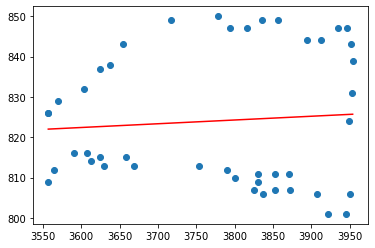

In [21]:
x_plot=np.arange(min(x),max(x)+0.1,0.1)
plt.scatter(x,y)
reg_eq=alpha*x_plot+beta
plt.plot(x_plot,reg_eq,'r')
plt.show()
# The regression line


# Defect(a) OLS

In [22]:
model=LinearRegression()
X=dfa.drop(["ya"],axis=1).values
y=dfa["ya"].values
model.fit(X,y)
train_r2 = model.score(X,y)
print(f"coefficient of determination in train: {train_r2}")
# Above gives goodness of fit in the training data
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")


coefficient of determination in train: 0.005899281904589659
intercept: 789.4608225921412
slope: [0.00916214]


# Defect b (TLS)

In [23]:
x=list(map(int,np.array(dfb['xb'])))
y=list(map(int,np.array(dfb['yb'])))
cov_matrix=np.array([x,y])
x_m=sum(x)/len(x)
y_m=(sum(y)/len(y))
cov=np.cov(cov_matrix)
print(cov)
print(x_m)
print(y_m)


[[2219.19786096 1759.7486631 ]
 [1759.7486631  1961.66488414]]
2143.8823529411766
3190.176470588235


In [24]:
alpha=(cov[1,1]-cov[0,0]+((cov[1,1]-cov[0,0])**2+4*cov[0,1]**2)**0.5)/(2*cov[0,1])
beta=y_m-alpha*x_m
print(alpha)
print(beta)


0.9295003595288813
1197.4370527417875


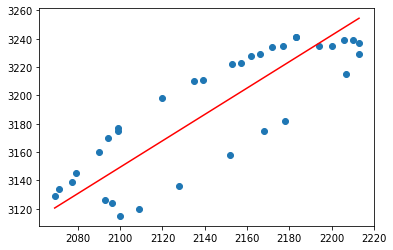

In [25]:
x_plot=np.arange(min(x),max(x)+0.1,0.1)
plt.scatter(x,y)
reg_eq=alpha*x_plot+beta
plt.plot(x_plot,reg_eq,'r')
plt.show()
# The regression line

## Defect 2 OLS 

In [26]:
model=LinearRegression()
X=dfb.drop(["yb"],axis=1).values
y=dfb["yb"].values
model.fit(X,y)
train_r2 = model.score(X,y)
print(f"coefficient of determination in train: {train_r2}")
# Above gives goodness of fit in the training data
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")


coefficient of determination in train: 0.7113452648547911
intercept: 1490.150451818115
slope: [0.7929661]


## Defect 3 TLS

In [27]:
x=list(map(int,np.array(dfc['xc'])))
y=list(map(int,np.array(dfc['yc'])))
cov_matrix=np.array([x,y])
x_m=sum(x)/len(x)
y_m=(sum(y)/len(y))
cov=np.cov(cov_matrix)
print(cov)
print(x_m)
print(y_m)


[[ 5196.1392964    917.83328586]
 [  917.83328586 31257.69064236]]
2832.747899159664
3522.3109243697477


In [28]:
alpha=(cov[1,1]-cov[0,0]+((cov[1,1]-cov[0,0])**2+4*cov[0,1]**2)**0.5)/(2*cov[0,1])
beta=y_m-alpha*x_m
print(alpha)
print(beta)

28.429820450623517
-77012.20323062046


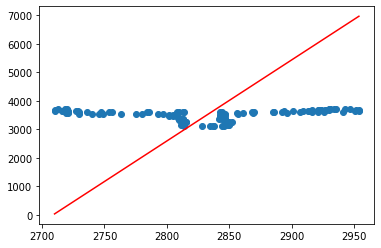

In [29]:
x_plot=np.arange(min(x),max(x)+0.1,0.1)
plt.scatter(x,y)
reg_eq=alpha*x_plot+beta
plt.plot(x_plot,reg_eq,'r')
plt.show()
# The regression line


# Defect 3 (OLS)

In [30]:
model=LinearRegression()
X=dfc.drop(["yc"],axis=1).values
y=dfc["yc"].values
model.fit(X,y)
train_r2 = model.score(X,y)
print(f"coefficient of determination in train: {train_r2}")
# Above gives goodness of fit in the training data
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")


coefficient of determination in train: 0.005186685723818751
intercept: 3021.9412914593113
slope: [0.17663754]


# Question 3

In [31]:
df=pd.read_excel('CO2.xlsx')
df

,Year,CO2,Temp(F)
0,1984,344.58,0.270
1,1985,346.04,0.234
2,1986,347.39,0.414
3,1987,349.16,0.666
4,1988,351.56,0.666
5,1989,353.07,0.522
6,1990,354.35,0.774
7,1991,355.57,0.720
8,1992,356.38,0.450
9,1993,357.07,0.504


In [32]:
df.describe()

,Year,CO2,Temp(F)
count,31.000000,31.000000,31.000000
mean,1999.000000,369.419677,0.851226
std,9.092121,16.256242,0.300666
min,1984.000000,344.580000,0.234000
25%,1991.500000,355.975000,0.639000
50%,1999.000000,368.330000,0.918000
75%,2006.500000,382.830000,1.098000
max,2014.000000,398.610000,1.332000


## OLS 

In [33]:
X=np.array(df["CO2"]).reshape(-1,1)
y=np.array(df["Temp(F)"]).reshape(-1,1)
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [34]:
train_r2 = model.score(X,y)
print(f"coefficient of determination in train: {train_r2}")
# Above gives goodness of fit in the training data
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination in train: 0.7854995845679958
intercept: [-5.20437848]
slope: [[0.01639221]]


## TLS 

In [36]:
x=list(map(float,np.array(df['CO2'])))
y=list(map(float,np.array(df['Temp(F)'])))
cov_matrix=np.array([x,y])
x_m=sum(x)/len(x)
y_m=(sum(y)/len(y))
cov=np.cov(cov_matrix)
print(cov)
print(x_m)
print(y_m)


alpha=(cov[1,1]-cov[0,0]+((cov[1,1]-cov[0,0])**2+4*cov[0,1]**2)**0.5)/(2*cov[0,1])
beta=y_m-alpha*x_m
print(alpha)
print(beta)


[[2.64265417e+02 4.33189374e+00]
 [4.33189374e+00 9.04001806e-02]]
369.4196774193549
0.8512258064516129
0.01639341081986616
-5.204822730426306


## OLS Part b 

In [37]:
X=np.array(df["Year"]).reshape(-1,1)
y=np.array(df["CO2"]).reshape(-1,1)
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [38]:
train_r2 = model.score(X,y)
print(f"coefficient of determination in train: {train_r2}")
# Above gives goodness of fit in the training data
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination in train: 0.992997706695476
intercept: [-3192.15348387]
slope: [[1.78167742]]
